In this notebook we learn about what is K-MEANS, how to implement, how we find the clusters.
In this notebook I take 2 Datasets to perform.

1) Income dataset

2) Iris dataset


First we take a simple dataset for a warmup.

In this notebook we identify and predict which age group has the highest chances of getting more income.
In this dataset we have two columns age and income and 22 number of rows.

First import all the necessary libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

Read the dataframe using pandas

In [2]:
df = pd.read_csv("../input/kmeans/k-means.csv")
df.head()

,name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Find the number of rows and columns to identify the volume of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    22 non-null     object
 1   age     22 non-null     int64 
 2   income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


to identify the relation/cluster of data, I draw the scatter plot between age income.

Text(0, 0.5, 'income')

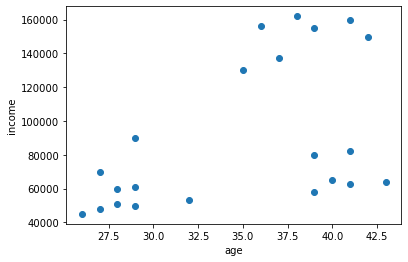

In [4]:
plt.scatter(df.age,df.income)
plt.xlabel('age')
plt.ylabel('income')

WE use KMeans clustering to build a model.

# **KMeans**
K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. 


Now we import KMenas through sklearn.

In [5]:
from sklearn.cluster import KMeans

We make three clusters (n_clusters=3)

and train the model using fit method


In [6]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['age','income']])

In [7]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

Now these cluster values we add to dataframe (df).

In [8]:
df['cluster']=y_predicted
df.head()

,name,age,income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Print the cluster centers.

In [9]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

Now we make different dataframes of each cluster.

In [10]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

Now we show different clusters using different colours and the centroid by a purple star.

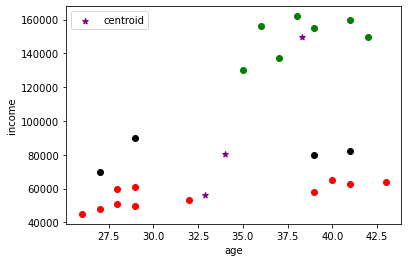

In [11]:
plt.scatter(df1.age,df1['income'],color='red')
plt.scatter(df2.age,df2['income'],color='green')
plt.scatter(df3.age,df3['income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('age')
plt.ylabel('income')
plt.legend()

As you can see the graph is not appropriate and the centroids are not perfectly formed. Now we will work again on this dataset to set the centroids and get the better results.


Now we transform our data and make every value between 0 to 1.

In [12]:
from sklearn.preprocessing import MinMaxScaler

now make the object of MinMaxScalar

In [13]:
scaler=MinMaxScaler()

Transform the data

In [14]:
scaler.fit(df[['income']])
df.income=scaler.transform(df[['income']])

scaler.fit(df[['age']])
df.age=scaler.transform(df[['age']])

In [15]:
df.head()

,name,age,income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Apply the KMeans model on this data again using fit method

In [16]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['age','income']])

In [17]:
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [18]:
df['cluster']=y_predicted
df.head()

,name,age,income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [19]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [20]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

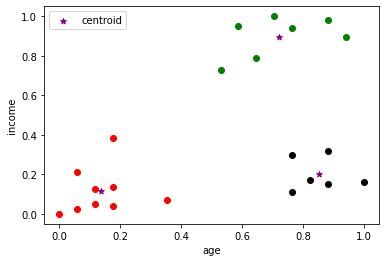

In [21]:
plt.scatter(df1.age,df1['income'],color='red')
plt.scatter(df2.age,df2['income'],color='green')
plt.scatter(df3.age,df3['income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('age')
plt.ylabel('income')
plt.legend()

As you seen above, now the centroids are in perfect position and make the perfect clusters.




Now we find Sum of squared distances of samples to their closest cluster center.

In [22]:
km.inertia_

0.4750783498553097

Now we find the relation bertween Number of clusters and sum of squared error

In [23]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','income']])
    sse.append(km.inertia_)

In [24]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2818479744366238,
 0.22020960864009395,
 0.1685851223602976,
 0.13265419827245162,
 0.10740235405674733]

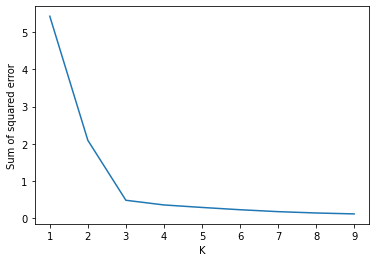

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

2)  Now we use IRIS dataset

import IRIS dataset from sklearn

In [26]:
from sklearn.datasets import load_iris

In [27]:
iris=load_iris()

Convert IRIS dataset into dataframe using pandas

In [28]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


we have to find the name of flower in this dataset

In [29]:
df['flower']=iris.target

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Clean the data -- remove unnecessary columns

In [31]:
df.drop(['sepal length (cm)','sepal width (cm)','flower'],axis=1,inplace=True)

In [32]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Find relation between petal length and width

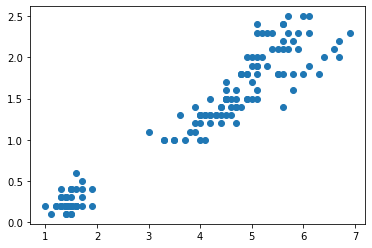

In [33]:
plt.scatter(df[['petal length (cm)']],df[['petal width (cm)']])

Now you can see in the above graph, we easily identify the clusters in data.


Now fit and transform the data

In [34]:
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])

In [35]:
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']])

In [36]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [37]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [38]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

In [39]:
y_predicted
df['cluster']=y_predicted

In [40]:
df1=df[df.cluster==0]

In [41]:
df2=df[df.cluster==1]
df3=df[df.cluster==2]

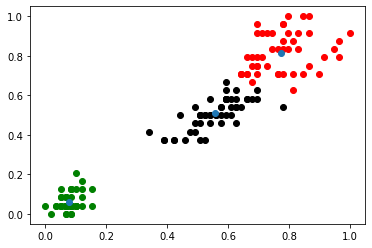

In [42]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

You can see there we will make a proper cluster and predict the better result accordingly

In [43]:
sse=[]
k_rng = range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)


Text(0, 0.5, 'sum of squared error')

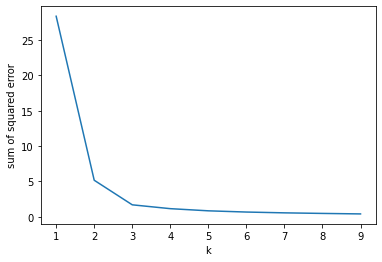

In [44]:
plt.plot(k_rng,sse)
plt.xlabel('k')
plt.ylabel('sum of squared error')

Now you can learn what is Kmeans algorithm, how it works, what are the methods to look into.
Now explore youself on the other documentations.